# Train, Test 데이터 모두 읽어오기

In [85]:
import pandas as pd

train = pd.read_csv("train.csv", index_col = "PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 891명의 승객이 있고, Feature는 11개가 있다.

In [86]:
test = pd.read_csv("test.csv", index_col = "PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* 예측해야할 승객이 418명이고, Features는 Survived빼고 10개

In [87]:
k = list(train.columns)
print(k)

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* (각 칼럼들에 대한 설명)

  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.


# Explore - 각 Feature들의 특징 파악하기
* **데이터의 전반적인 분포를 알고 싶다면 데이터 시각화(seaborn, matplotlib 등등)**
* **통계치 하나하나의 구체적인 수치를 알고 싶다면 pivot_table이용**

In [88]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## 성별(Sex)

<AxesSubplot:xlabel='Sex', ylabel='count'>

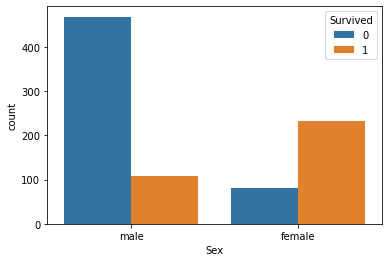

In [89]:
sns.countplot(data = train, x = "Sex", hue = "Survived")

* 여성의 생존률이 압도적으로 높다.

In [90]:
# 엑셀이 익숙하신분들을 위해 pivotstyle

pd.pivot_table(train, index = "Sex", values = "Survived")

,Survived
Sex,
female,0.742038
male,0.188908


* 여자 생존률 74.2%
* 남자 생존률 18.8%


* **결론 : 성별은 유의미한 Feature다**

## 좌석등급(Pclass)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

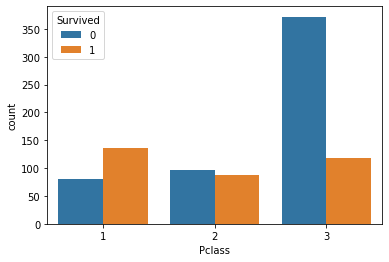

In [91]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

* 객실 등급(Pclass)이 높을수록 생존 확률이 더 높다.

In [92]:
pd.pivot_table(train, index = "Pclass", values = "Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


* 1등급 객실 : 생존확률 62.9%
* 2등급 객실 : 생존확률 47.2%
* **3등급 객실 : 생존확률 25%**

## 선착장(Embarked)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

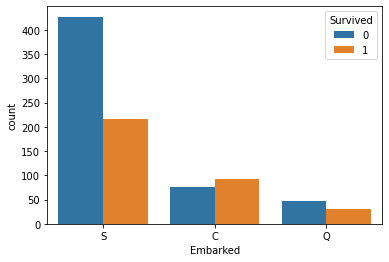

In [93]:
sns.countplot(data = train, x = "Embarked", hue = "Survived")

In [94]:
pd.pivot_table(data = train, index = "Embarked", values = "Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


* C(Cherbourg)에서 탑승했을 경우 생존 확률 높음

*주의할 점*

- C와 Q의 경우 표본의 크기가 너무 적음. 따라서 C의 생존확률만 유의미한 수치로 받아들이는 것이 좋을 듯.(이건 같은 그래프를 보고 어떻게 해석하느냐의 차이다.)

## Age

<Figure size 1440x504 with 0 Axes>

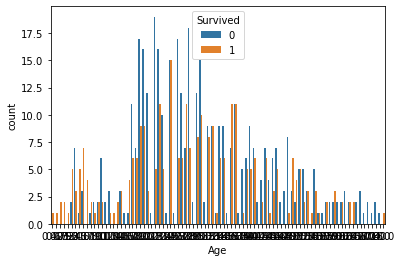

<Figure size 1440x504 with 0 Axes>

In [95]:
sns.countplot(data = train, x = "Age", hue = "Survived")
plt.figure(figsize = (20,7))

* 그래프에서 알 수 있듯이 x선 단위가 복잡하다
* 따라서 이번엔 단변량 분석이 아닌 **다변량 분석**을 해 보자!(lmplot)

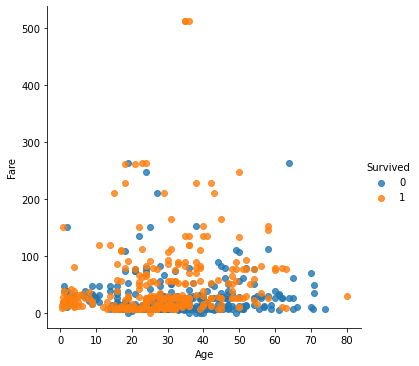

In [96]:
sns.lmplot(data=train, x= "Age", y = "Fare", hue = "Survived", fit_reg = False)
#fit_leg는 그래프에서 나타나는 회귀선을 없애주는 역할

* 일단 그래프에서 Fare가 500이상인 점이 3개 있는데, 이건 **이상치**이기 때문에 삭제해주는 것이 데이터 분석할 때 유리하다. 평균 임금 계산할 때, 극 상위층(임원 일가) 몇 명을 제외하고 계산하는 것과 같은 이유다

In [97]:
low_fare = train[train["Fare"]<500] #새로운 pandas

train.shape, low_fare.shape

((891, 11), (888, 11))

* 500달러 이상 이상치가 3개인 것을 알 수 있음.

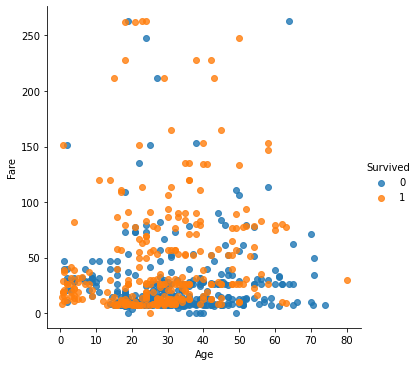

In [98]:
#이제 이상치 제외하고 그래프 그려보자
sns.lmplot(data = low_fare, x = "Age", y="Fare", hue = "Survived", fit_reg = False)

* 결론 : 50달러 미만의 운임요금, 40세 미만인 경우에 생존 확률이 가장 높았음.

In [159]:
# 얘기들은 생존확률이 높지 않을까?
train["Child"] = train["Age"] < 15

train[['Age', 'Child']].head(15)

,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [158]:
test['Child'] = test['Age'] < 15

test[['Age', 'Child']].head(15)

,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


<AxesSubplot:xlabel='Child', ylabel='count'>

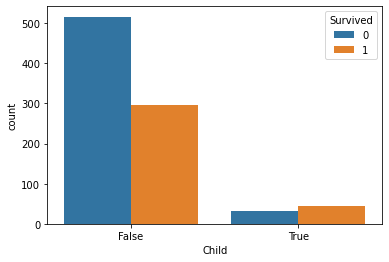

In [160]:
sns.countplot(data = train, x = "Child", hue = "Survived")

In [162]:
pd.pivot_table(data = train, index = "Child", values = "Survived")

,Survived
Child,
False,0.365314
True,0.576923


* 아이의 경우 확실히 생존확률 높음

## SibSp, Parch

* SibSp = 탑승한 형제, 자매, 배우자
* Parch = 부모, 자식
* **SibSp + Parch = 동반 탑승객**

In [99]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

In [100]:
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head(10)

(891, 12)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,1
2,1,0,1
3,0,0,0
4,1,0,1
5,0,0,0
6,0,0,0
7,0,0,0
8,3,1,4
9,0,2,2


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

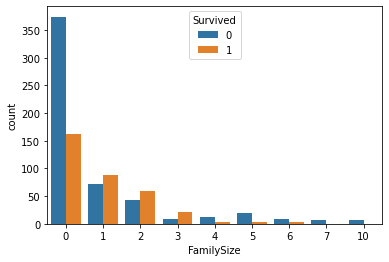

In [101]:
sns.countplot(data= train, x="FamilySize", hue = "Survived")

In [102]:
low_familysize = train[train["FamilySize"]<=2]
high_familysize = train[train["FamilySize"]>2]

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

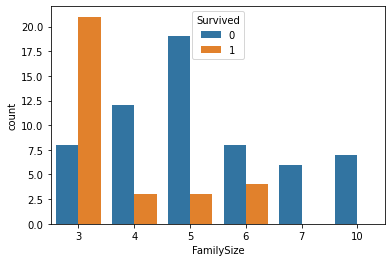

In [103]:
sns.countplot(data= high_familysize, x = "FamilySize", hue = "Survived")

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

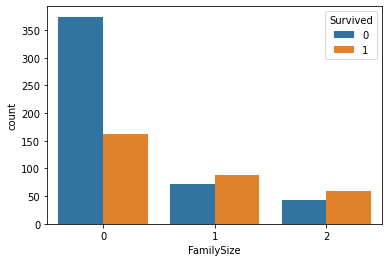

In [104]:
sns.countplot(data=low_familysize, x = "FamilySize", hue = "Survived")

* 혼자탔을 경우, 4명 이상의 대가족인 경우 사망 확률 높음

In [106]:
#1명 = Single, 5명이상 = Big(대가족), 그외 = Nuclear(핵가족)으로 분류

train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력
# 출력은 (row, column) 으로 표시
print(train.shape)

# train 데이터의 상위 10개를 띄우되, FamilySize와 FamilyType 컬럼만 출력
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,1,Single
2,1,Single
3,0,NaN
4,1,Single
5,0,NaN
6,0,NaN
7,0,NaN
8,4,Nuclear
9,2,Nuclear


<AxesSubplot:xlabel='FamilyType', ylabel='count'>

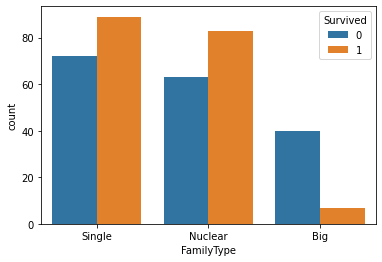

In [107]:
sns.countplot(data= train, x = "FamilyType", hue ="Survived")

In [108]:
pd.pivot_table(data=train, index = "FamilyType", values = "Survived")

,Survived
FamilyType,
Big,0.148936
Nuclear,0.568493
Single,0.552795


* 대가족일 경우 생존확률 압도적으로 떨어짐

## Name(이건 일단 제외하고 생각하자)

In [116]:
train.loc[:, ["Name"]].head(15)

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
6,"Moran, Mr. James"
7,"McCarthy, Mr. Timothy J"
8,"Palsson, Master. Gosta Leonard"
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


##### 알 수 있는 특징?
- A, B. C 요런식으로 구성됨
- A = 성, B = 호칭, C = 이름
* 성, 이름은 다 다르니까 분류해봤자 의미 없고, '호칭'은 Mr. Miss등으로 나뉘니까 이게 쓸모 있음. 따라서 B(호칭) 부분을 떼어내자!

In [124]:
def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

* 너무 많은데 일단 우리가 친숙한 Mr, Mrs, Miss, Master 가지고만 시각화 해보자

In [125]:
# 호칭을 저장하는 컬럼은 없으므로 "Title"이라는 새로운 컬럼을 만듭니다.
# Name에 "Mr"가 포함되어 있으면 Title 컬럼에 "Mr"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"

# Name에 "Miss"가 포함되어 있으면 Title 컬럼에 "Miss"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"

# Name에 "Mrs"가 포함되어 있으면 Title 컬럼에 "Mrs"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"

# Name에 "Master"가 포함되어 있으면 Title 컬럼에 "Master"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"


train[["Name", "Title"]].head(10)

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


<AxesSubplot:xlabel='Title', ylabel='count'>

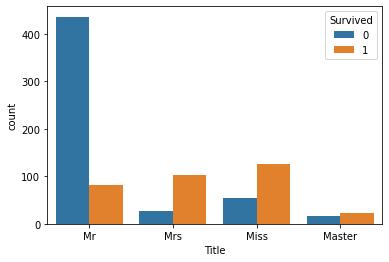

In [126]:
sns.countplot(data = train, x = "Title", hue = "Survived")

# 전처리(Preprocessing)

내가 무슨 알고리즘을 쓸 것이냐에 따라서, 데이터를 어떻게 **전처리**해야하는 지가 달라짐. 
타이타닉 문제는 죽냐, 사냐 2분법적이기 때문에 **Regression** 형태의 문제임. 어떤 알고리즘을 쓸 것이냐? **Decion Tree** 계열의 **[scikit-learn](scikit-learn.org)** 알고리즘을 쓰자!!

* 전제조건 1 : 모든 데이터는 숫자로 구성되어야 한다 -> Sex, Embarked 전처리 필요
* 전제조건 2 : 데이터에 빈 값(결측치)이 없어야 한다.

**!!! 여기서부터는 TEST데이터도 encode 해줘야 함 !!!**

## Sex

In [131]:
# 남자는 0, 여자는 1

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

train[["Sex", "Sex_encode"]].head(3)

,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0


In [132]:
# Test 데이터 encode

test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

test[["Sex", "Sex_encode"]].head(3)

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0


## 결측치 제거

* **이부분 SK C&C 데분 직무 시험때 19년 20년 2년 연속 나옴. 반드시 숙지할 것!!!!**

1. column에서 결측치 찾기
train["열이름"].isnull()
2. row에서 결측치 찾기
train.isnull()
3. 결측치들에다가 값 집어넣기 or 결측치가 있는 행 모조리 삭제
-  train.fillna(value = 0)
- train.dropna(how='any')

In [142]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,


In [141]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [148]:
test["Fare"] = test["Fare"].fillna(0)
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


In [149]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


## Embarked

* Q = 0, S = 1, C = 2 이런식으로 encoding 하면 큰일남. S + S = C가 아니니까
* 따라서 C, S, Q를 숫자로 변환해주되, 세 값에 **특정 연산(사칙연산)**이 불가능 하도록 만들어줘야 함

"""

* 이러한 방식을 [원 핫 인코딩(One Hot Encoding)](https://minjejeon.github.io/learningstock/2017/06/05/easy-one-hot-encoding.html) 이라고 함.

"""

In [153]:
# 먼저 Embarked 컬럼이 C이면 True, C가 아니면 False인 색인 코드를 작성
# 그리고 여기서 나온 결과를 그대로 Embarked_C 라는 새로운 컬럼에 대입
train["Embarked_C"] = train["Embarked"] == "C"

train["Embarked_S"] = train["Embarked"] == "S"

train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 18)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [154]:
test["Embarked_C"] = test["Embarked"] == "C"

test["Embarked_S"] = test["Embarked"] == "S"

test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)

test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## Age(위에서 Child 열로 이미 했음)

## FamilySize(지금 안 함)

## Name(지금 안 함)

# Train(학습)

  * **Feature**: 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 그리고 4) 선착장(Embarked)을 사용
  * **Label**: 생존 여부(Survived)를 사용
  
  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train
  

In [166]:
# 테스트를 위해 간단하게 feature는 성별 ,Pclass,, Child만 사용해보자

features = ['Sex_encode', 'Pclass', 'Child']

train[features]

,Sex_encode,Pclass,Child
PassengerId,,,
1,0.0,3,False
2,1.0,1,False
3,1.0,3,False
4,1.0,1,False
5,0.0,3,False
...,...,...,...
887,0.0,2,False
888,1.0,1,False
889,1.0,3,False


* X_train, Y_train

In [167]:
X_train = train[features]

X_train.head()

,Sex_encode,Pclass,Child
PassengerId,,,
1,0.0,3,False
2,1.0,1,False
3,1.0,3,False
4,1.0,1,False
5,0.0,3,False


In [168]:
label = "Survived"

y_train = train[label]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

* X_test, Y_test(이걸 구하는게 목표)

In [173]:
X_test = test[features]

X_test.head()

,Sex_encode,Pclass,Child
PassengerId,,,
892,0.0,3,False
893,1.0,3,False
894,0.0,2,False
895,0.0,3,False
896,1.0,3,False


## Modeling(실제 알고리즘 사용)

In [176]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, random_state=0)
#트리의 최대 깊이는 7

model

DecisionTreeClassifier(max_depth=8, random_state=0)

In [178]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [179]:
#위에서 구한 DecisionTree에 실제 Data 대입!!
prediction = model.predict(X_test)
prediction[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

# Submit(제출)

In [186]:
submission = pd.read_csv("gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [188]:
submission['Survived'] = prediction

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [189]:
submission.to_csv("submission.csv", index=False)

이러면 점수 0.77511나옴. 이제 feature로 Embarked. FamilySize도 사용해보자

# 4부터 다시 반복

In [204]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'FamilyType', 'Title',
       'Sex_encode', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Child'],
      dtype='object')

In [205]:
features = ['Sex_encode', 'Pclass', 'Child', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

X_train = train[features]

X_train.head()

,Sex_encode,Pclass,Child,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,0.0,3,False,False,True,False
2,1.0,1,False,True,False,False
3,1.0,3,False,False,True,False
4,1.0,1,False,False,True,False
5,0.0,3,False,False,True,False


In [213]:
X_test = test[features]
X_test.head()

,Sex_encode,Pclass,Child,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,0.0,3,False,False,False,True
893,1.0,3,False,False,True,False
894,0.0,2,False,False,False,True
895,0.0,3,False,False,True,False
896,1.0,3,False,False,True,False


In [214]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
#트리의 최대 깊이는 7

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [224]:
prediction = model.predict(X_test)

prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [225]:
submission = pd.read_csv("gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [226]:
submission["Survived"] = prediction

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [228]:
submission.to_csv("submission.csv", index=False)